# Tech Challenge - Fase 1: Análise Preditiva de Diabetes

## Introdução

**Objetivo do Projeto:** Este notebook tem como objetivo desenvolver um modelo de Machine Learning capaz de prever a probabilidade de um paciente ter diabetes, com base em certas medidas diagnósticas presentes no dataset. Este trabalho é parte do Tech Challenge, que busca aplicar fundamentos de Inteligência Artificial e Machine Learning para criar uma solução de suporte à decisão na área da saúde.

**O Problema de Negócio:** O diagnóstico precoce do diabetes é fundamental para prevenir complicações graves de saúde. Um sistema de triagem inteligente pode ajudar profissionais de saúde a identificar pacientes de alto risco que necessitam de acompanhamento mais detalhado, otimizando recursos e melhorando os resultados clínicos.

**Dataset:** Utilizamos o ["Diabetes Dataset"](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data), um conjunto de dados clássico e amplamente utilizado para problemas de classificação. Ele contém informações sobre pacientes do sexo feminino de ascendência Pima, com pelo menos 21 anos de idade.

**Metodologia:**
1.  **Análise e Limpeza dos Dados:** Investigaremos a qualidade dos dados, trataremos valores inconsistentes e prepararemos o dataset para análise.

2.  **Análise Exploratória de Dados (EDA):** Utilizaremos visualizações para entender as relações entre as variáveis e a ocorrência de diabetes.

3.  **Pré-processamento e Modelagem:** Prepararemos os dados para os algoritmos e treinaremos modelos de classificação, abordando o problema de desbalanceamento de classes.

4.  **Avaliação e Interpretação:** Avaliaremos o desempenho dos modelos com métricas apropriadas e interpretaremos os resultados para extrair conclusões relevantes.

---

## 1. Importação das Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

---

## 2. Carregamento e Análise Inicial dos Dados

Esta seção permanece a mesma. Carregamos os dados e exploramos suas características, confirmando o desbalanceamento das classes.

In [4]:
# Para executar no Colab, primeiro faça o upload do arquivo 'heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/diabetes/src/diabetes.csv')
print("\nPrimeiras 5 linhas do dataset:")
display(df.head())


Primeiras 5 linhas do dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


| Coluna                    | Descrição                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Pregnancies               | Número de vezes que a paciente esteve grávida.                                                                            |
| Glucose                   | Concentração de glicose no plasma 2 horas após um teste oral de tolerância à glicose.                                     |
| BloodPressure             | Pressão arterial diastólica (mm Hg).                                                                                      |
| SkinThickness             | Espessura da dobra cutânea do tríceps (mm).                                                                               |
| Insulin                   | Nível de insulina no soro após 2 horas (mu U/ml).                                                                         |
| BMI                       | Índice de Massa Corporal (calculado como peso em kg / (altura em m)²).                                                    |
| DiabetesPedigreeFunction  | Função de pedigree de diabetes, que representa uma pontuação da probabilidade de diabetes com base no histórico familiar. |
| Age                       | Idade da paciente (em anos).                                                                                              |
| Outcome **(Alvo)**        | Variável alvo que indica o diagnóstico (0 = Não Diabético, 1 = Diabético).                                                |

In [5]:
df.shape

(768, 9)

Neste dataset temos 768 linhas e 9 colunas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Análise Inicial:** O dataset não possui valores nulos (`null`) explícitos. No entanto, ao olharmos as estatísticas descritivas, podemos notar um problema sério.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Problema Crítico:** As colunas `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI` têm valores mínimos iguais a `0`. Fisiologicamente, é impossível ter um nível de glicose, pressão arterial ou IMC igual a zero. Esses valores `0` são, na verdade, dados ausentes (missing data) que foram registrados incorretamente. Precisamos tratá-los antes de prosseguir.

---

## 3. Limpeza e Pré-processamento dos Dados

### 3.1 Tratamento de Valores Inconsistentes (Zeros)

Vamos substituir os valores `0` nas colunas problemáticas por `NaN` (Not a Number), que é a forma padrão de representar dados ausentes no pandas. Depois, vamos preencher esses valores ausentes usando a **mediana** de cada coluna. A mediana é mais robusta a outliers do que a média, sendo uma escolha mais segura.

In [8]:
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

print("Contagem de valores nulos APÓS substituir os zeros:")
print(df.isnull().sum())

Contagem de valores nulos APÓS substituir os zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Podemos notar através deste tratamento de dados, que a ausência de nulos era um falso positivo, e com a substituição de valores a presença ficou evidente.

In [9]:
# Preenchendo os valores NaN com a mediana de cada coluna
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Verificação de nulos APÓS imputação:")
print(df_imputed.isnull().sum().sum())

print("\nEstatísticas descritivas do dataset limpo:")
display(df_imputed.describe())

Verificação de nulos APÓS imputação:
0

Estatísticas descritivas do dataset limpo:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---

## 4. Análise Exploratória de Dados (EDA)

### 4.1 Análise da Variável Alvo (`Outcome`)

Verificamos o balanceamento das classes. `0` = Não Diabético, `1` = Diabético.

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_30807/2433008006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_imputed, palette='viridis')


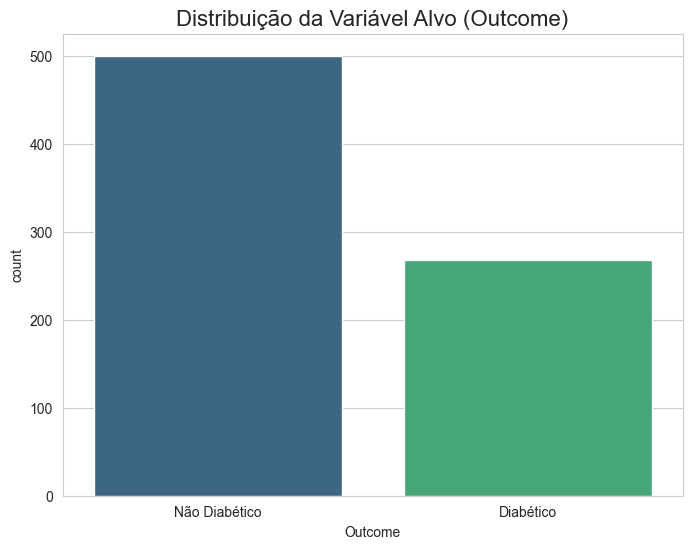

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df_imputed, palette='viridis')
plt.title('Distribuição da Variável Alvo (Outcome)', fontsize=16)
plt.xticks([0, 1], ['Não Diabético', 'Diabético'])
plt.show()
print(df_imputed['Outcome'].value_counts(normalize=True))

**Análise:** O dataset é desbalanceado, com aproximadamente 65% de casos negativos e 35% de casos positivos. Embora não seja tão extremo, ainda é um desbalanceamento que justifica o uso de técnicas como `class_weight='balanced'`.

### 4.2 Matriz de Correlação

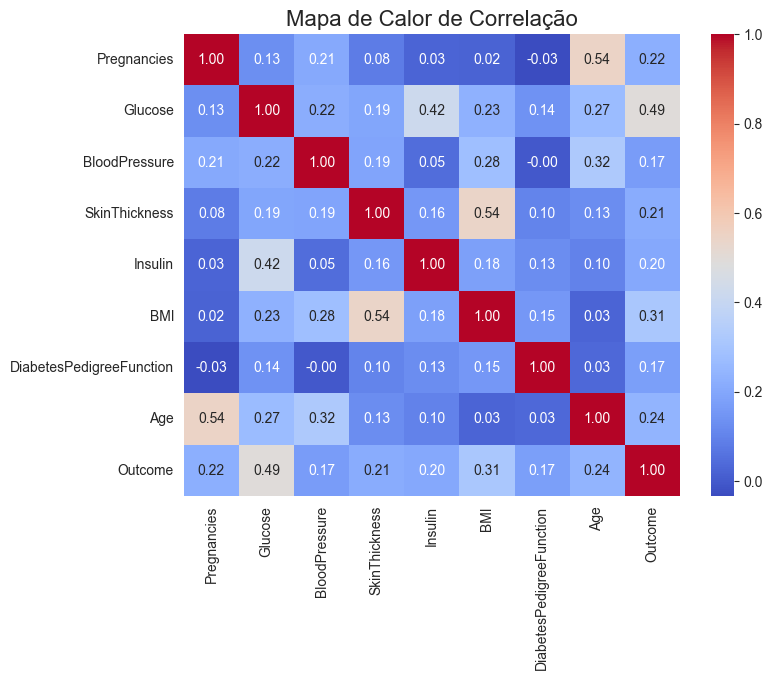

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação', fontsize=16)
plt.show()

**Análise:** `Glucose` tem a correlação positiva mais forte com `Outcome` (0.49), o que é esperado. `BMI` (0.31) e `Age` (0.24) também mostram correlações positivas relevantes. `Pregnancies` e `Age` têm uma correlação moderada entre si (0.54).

### 4.3 Análise de Cruzamento de Dados (Multivariada)

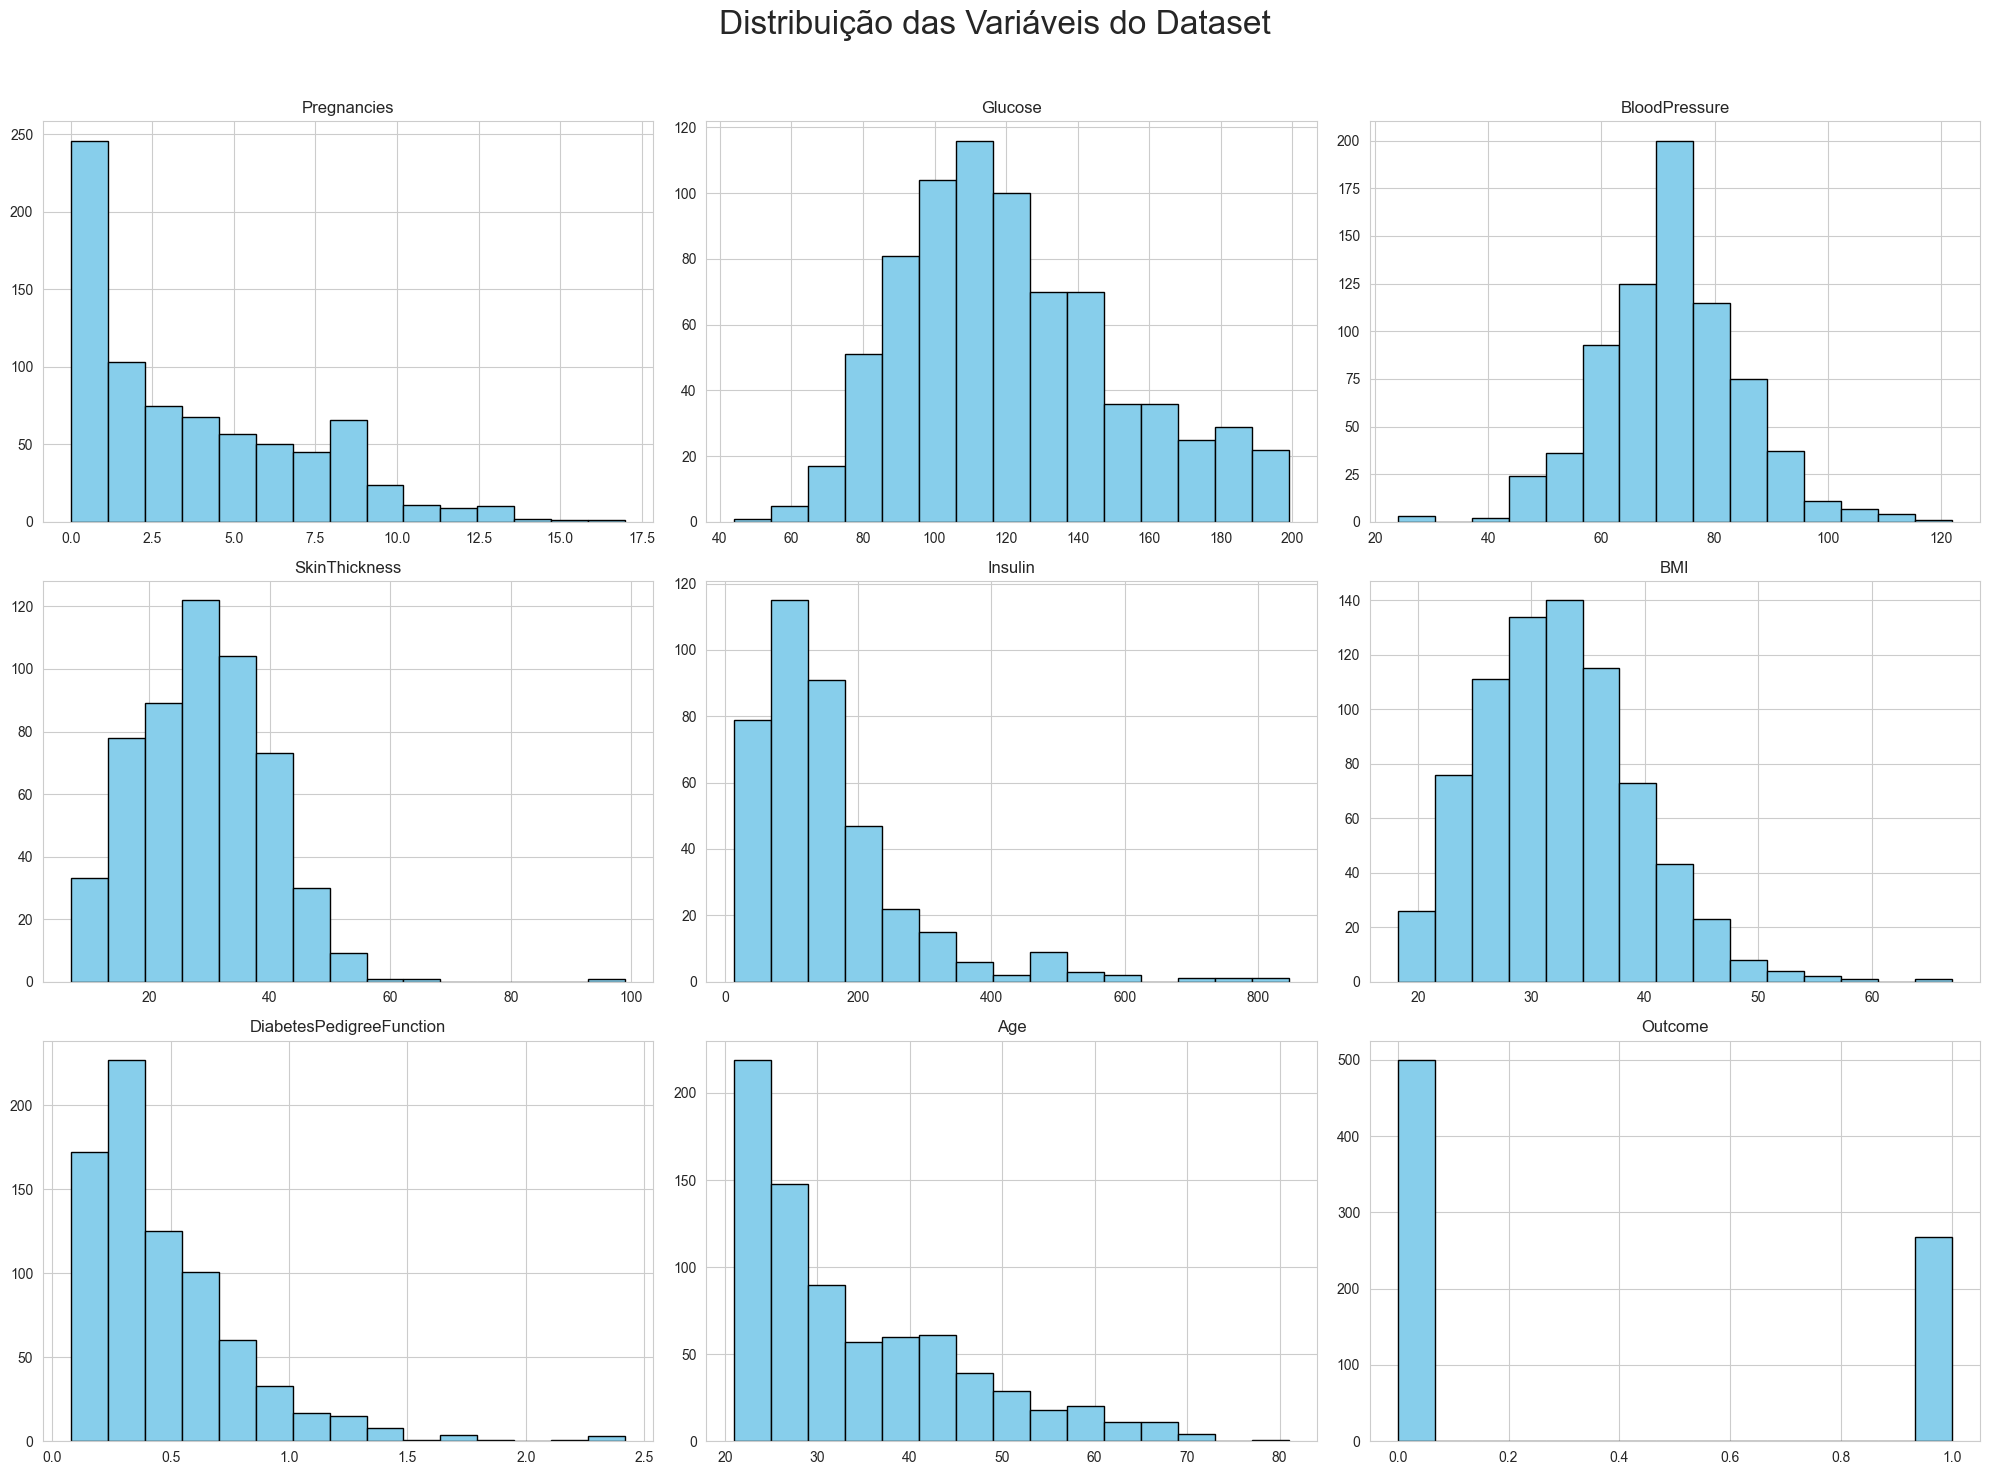

In [12]:
df.hist(figsize=(20, 15), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis do Dataset', size=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Acima temos detalhadas as variáveis, auxiliando em uma análise mais detalhada e na identificação de possíveis outliers. Vamos àlgumas análises adicionais.

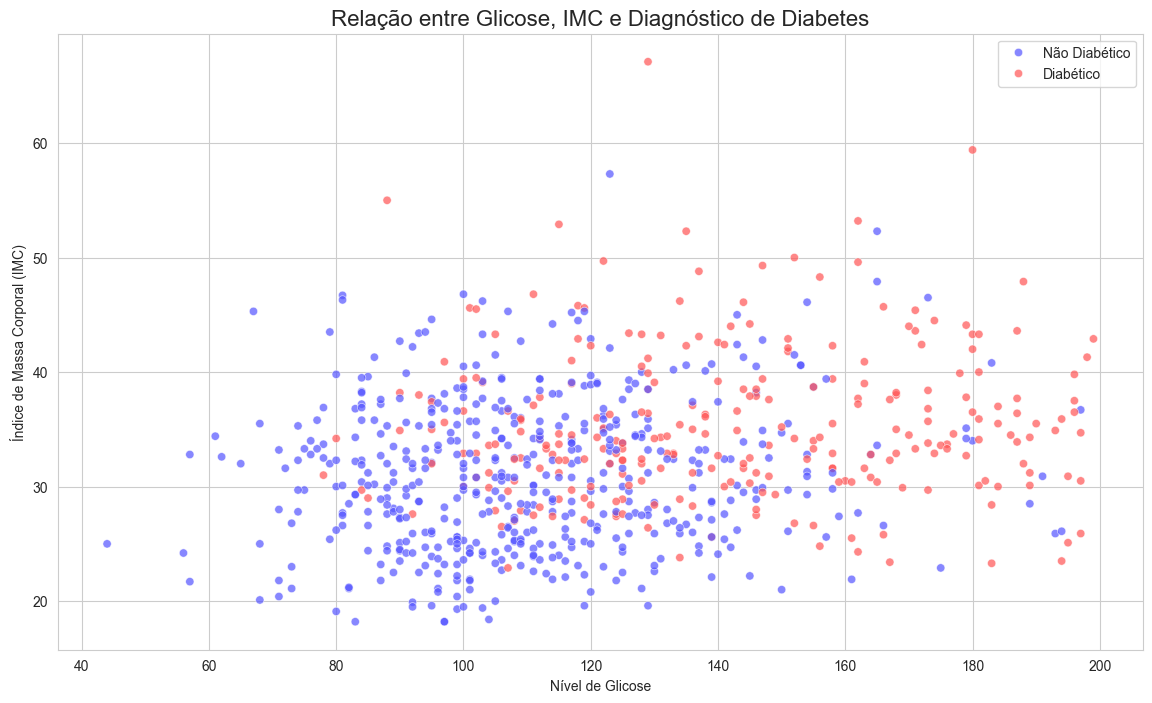

In [13]:
# Gráfico 1: Glicose vs. IMC, colorido pelo Diagnóstico
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_imputed, x='Glucose', y='BMI', hue='Outcome', palette='seismic', alpha=0.7)
plt.title('Relação entre Glicose, IMC e Diagnóstico de Diabetes', fontsize=16)
plt.xlabel('Nível de Glicose')
plt.ylabel('Índice de Massa Corporal (IMC)')
leg = plt.legend()
leg.get_texts()[0].set_text('Não Diabético')
leg.get_texts()[1].set_text('Diabético')
plt.show()

**Análise do Gráfico 1:** Este gráfico mostra uma clara separação. Os pontos vermelhos (Diabéticos) estão concentrados na área de alta glicose e alto IMC. Isso sugere que a combinação desses dois fatores é um forte indicador de risco. Há uma sobreposição, mas a tendência é evidente.

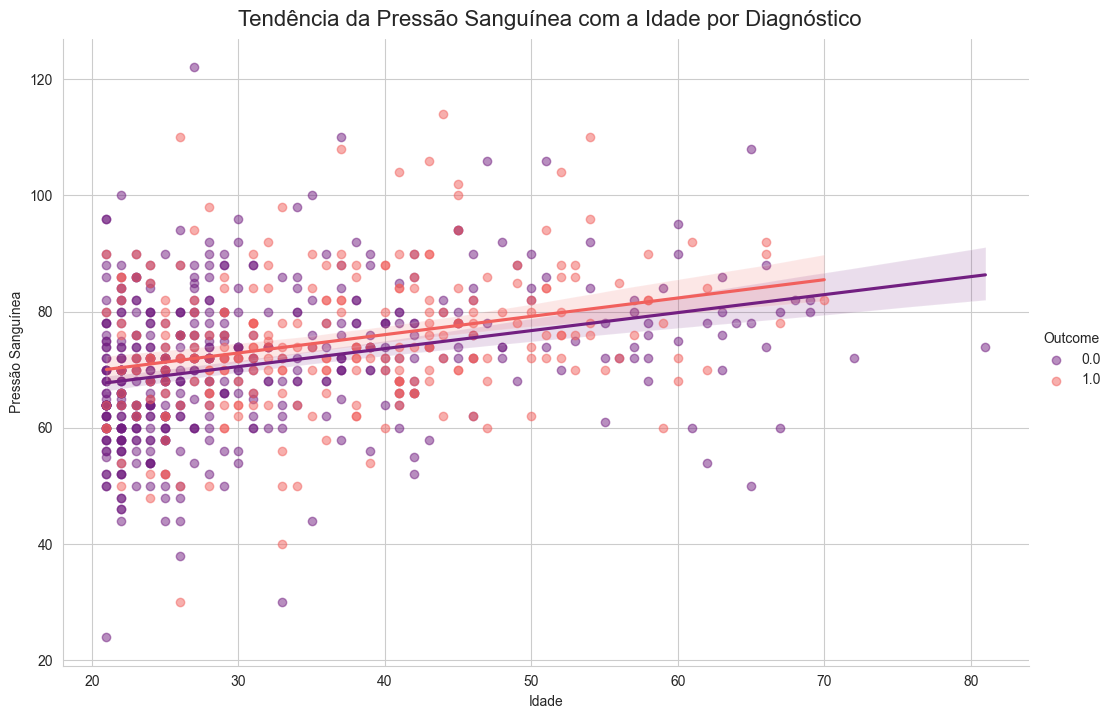

In [14]:
g = sns.lmplot(data=df_imputed, x='Age', y='BloodPressure', hue='Outcome', 
    palette='magma', height=7, aspect=1.5,
    scatter_kws={'alpha':0.5})
g.fig.suptitle('Tendência da Pressão Sanguínea com a Idade por Diagnóstico', y=1.02, fontsize=16)
g.set_axis_labels("Idade", "Pressão Sanguínea")
plt.show()

**Análise do Gráfico 2:** O gráfico mostra a tendência da pressão arterial com o aumento da idade. Para ambos os grupos, a pressão tende a aumentar com a idade (as linhas de regressão são ascendentes). No entanto, a nuvem de pontos para o grupo diabético (roxo escuro) parece estar, em média, ligeiramente acima da do grupo não diabético, especialmente em idades mais avançadas.

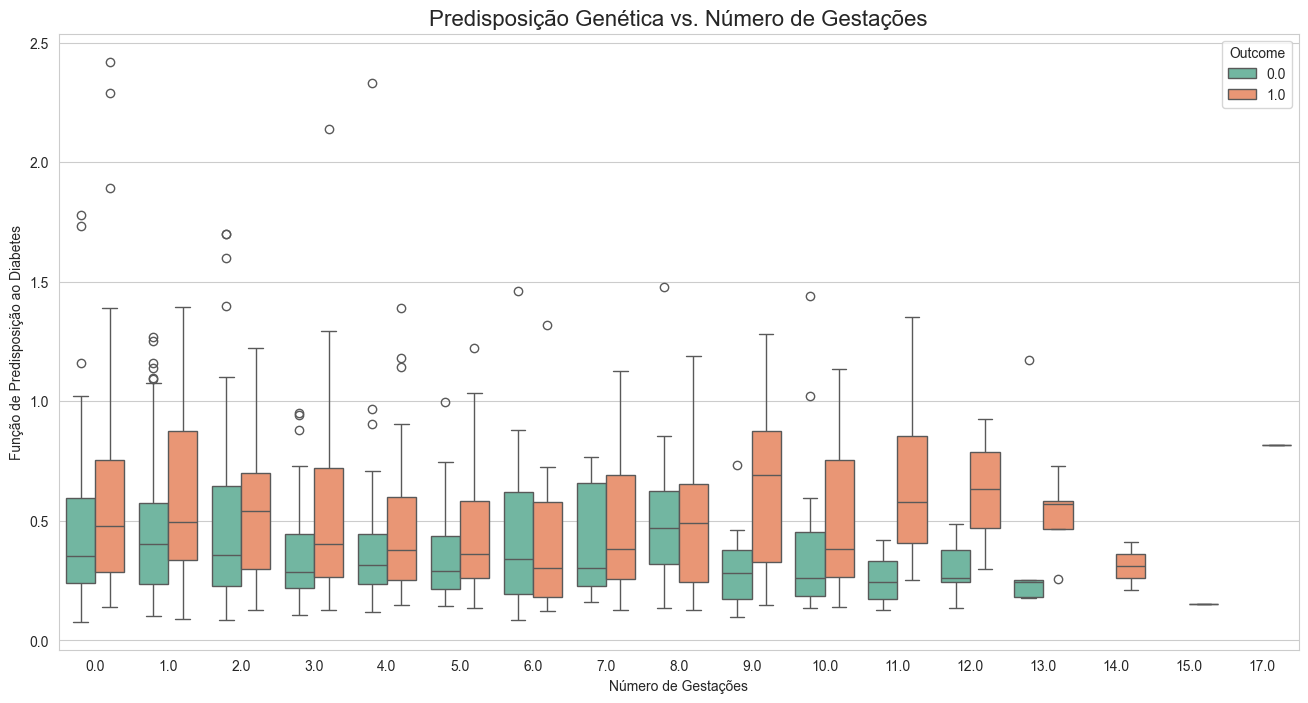

In [15]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_imputed, x='Pregnancies', y='DiabetesPedigreeFunction', hue='Outcome', palette='Set2')
plt.title('Predisposição Genética vs. Número de Gestações', fontsize=16)
plt.xlabel('Número de Gestações')
plt.ylabel('Função de Predisposição ao Diabetes')
plt.show()

**Análise do Gráfico 3:** A `DiabetesPedigreeFunction` é uma medida da predisposição genética. Este gráfico mostra que, para quase todos os números de gestações, a mediana da função de predisposição é maior para o grupo diabético (caixas laranjas). Isso reforça a ideia de que a genética desempenha um papel importante, e esse risco parece ser consistente independentemente do número de gestações.

### Bônus - Análise detalhada utilizando Pandas Profiling

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Relatório de Análise de Diabetes")
# profile.to_notebook_iframe()
profile.to_file("./diabetes_report.html")

/Users/antoniorafael/workspace/Personal/ai/pos/tech-challenge/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 31.77it/s]


---

## 5. Pré-processamento Final e Modelagem

#### Divisão em treino e teste com estratificação

In [17]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Normalização dos Dados (Padronização)

Antes de treinar nossos modelos, realizamos uma etapa crucial de pré-processamento chamada Padronização.

##### **Por que isso é necessário?**

Nosso conjunto de dados contém variáveis com escalas muito diferentes. Por exemplo, a coluna `Glucose` pode ter valores acima de 150, enquanto a `DiabetesPedigreeFunction` geralmente tem valores abaixo de 1.0.

Algoritmos como a **Regressão Logística** são sensíveis a essas diferenças de escala. Sem um ajuste, o modelo poderia erroneamente atribuir mais importância a uma variável simplesmente porque seus valores numéricos são maiores, e não porque ela é mais preditiva. Isso pode levar a um treinamento menos eficiente e a resultados enviesados.

A padronização coloca todas as nossas variáveis em uma "mesma régua", garantindo que o modelo as compare de forma justa, baseando-se apenas no seu poder preditivo.

##### **O que foi feito no código?**

Utilizamos a classe StandardScaler da biblioteca Scikit-learn para realizar a padronização. O processo é dividido em três linhas:

1. `scaler = StandardScaler()`

    - Aqui, simplesmente criamos uma instância do objeto padronizador. Ele está pronto para aprender como escalar nossos dados.

2. `X_train_scaled = scaler.fit_transform(X_train)`

    - Esta é a etapa mais importante. O comando fit_transform realiza duas ações nos dados de treino:

        - fit: O scaler "aprende" os parâmetros de escala (a média e o desvio padrão) de cada coluna apenas com os dados de treino. É fundamental que isso seja feito somente com os dados de treino para evitar o "vazamento de dados" (data leakage) do conjunto de teste.

        - transform: Em seguida, ele aplica essa transformação, ajustando os dados de treino para que tenham uma média de 0 e um desvio padrão de 1.

3. `X_test_scaled = scaler.transform(X_test)`

    - Para os dados de teste, usamos apenas o comando transform. Isso garante que estamos aplicando exatamente a mesma transformação que foi aprendida com os dados de treino. Isso simula como o modelo se comportaria com dados novos e desconhecidos no mundo real, tornando nossa avaliação muito mais precisa e confiável.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1 Treinamento dos Modelos com Balanceamento de Classes

Com os dados devidamente pré-processados, estamos prontos para criar os modelos. O objetivo é treinar algoritmos que aprendam os padrões nos dados de treino para, então, fazer previsões precisas nos dados de teste, que simulam novos pacientes.

Dado o desbalanceamento de 65/35, vamos usar `class_weight='balanced'` para garantir que o modelo não seja enviesado em favor da classe majoritária.

#### **5.1.1. Modelo 1: Regressão Logística**

In [19]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### **5.1.2. Modelo 2: Árvore de Decisão Balanceada**

In [20]:
# Árvore de Decisão Balanceada
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

---

## 6. Avaliação dos Modelos

Agora que ambos os modelos foram treinados e testados, vamos comparar seus resultados e discutir a escolha da métrica mais importante para o nosso problema.

Antes de entrarmos na avaliação propriamente dita, vamos elucidar um pouco sobre as definições de cada métrica.

#### A Base de Tudo: Matriz de Confusão

Uma tabela 2x2 que compara a realidade com as previsões do modelo. **Entender isso é a chave para entender todo o resto.**. Abaixo um exemplode matriz confusão, mas já vimos algumas anteriormente neste notebook:

|             | **Previsto: Não Diabético** | **Previsto: Diabético** |
| :---------- | :----------------------- | :---------------------- |
| **Real: Não Diabético** | **Verdadeiro Negativo (VN)** \<br\> *ACERTO: não tinha e o modelo disse que não tinha.* | **Falso Positivo (FP)** \<br\> *ERRO: não tinha, mas o modelo disse que tinha. (Alarme Falso)* |
| **Real: Diabético** | **Falso Negativo (FN)** \<br\> *ERRO: tinha, mas o modelo disse que não tinha. (O Pior Erro\!)* | **Verdadeiro Positivo (VP)** \<br\> *ACERTO: tinha e o modelo disse que tinha.* |

Vamos às métricas, que são todas calculadas a partir desses 4 valores:

  * **Acurácia (Accuracy):**

      * **O que é?** (Total de Acertos) / (Total de Previsões) -\> `(VP + VN) / Total`

      * **Tradução:** "De todas as previsões feitas, qual a porcentagem de acertos?"

      * **A Cilada:** A acurácia pode ser perigosa em dados desbalanceados. Se 99% das pessoas são saudáveis, um modelo que SEMPRE chuta "Saudável" terá 99% de acurácia, mas é inútil para encontrar quem está doente.

  * **Precisão (Precision):**

      * **O que é?** `VP / (VP + FP)`

      * **Tradução:** "De todos os que o modelo classificou como **Doentes**, quantos ele acertou?"

      * **Quando é importante?** Quando o custo de um **Falso Positivo** é alto. Ex: Você não quer mandar um paciente saudável para uma cirurgia cara e arriscada. Você quer que, QUANDO seu modelo der o alarme, ele esteja muito certo.

  * **Recall (Sensibilidade / Revocação):**

      * **O que é?** `VP / (VP + FN)`

      * **Tradução:** "De todos que **realmente eram Doentes**, quantos o modelo conseguiu encontrar?"

      * **Quando é importante?** Quando o custo de um **Falso Negativo** é altíssimo. Este é o caso da detecção de doenças. Você não pode, de jeito nenhum, mandar um paciente doente para casa achando que ele está bem. Você quer encontrar TODOS os doentes, mesmo que isso signifique gerar alguns alarmes falsos no processo.

  * **F1-Score:**

      * **O que é?** Uma média harmônica entre a Precisão e o Recall.

      * **Tradução:** Um único número que tenta balancear os dois mundos.

      * **Quando é importante?** Quando você se importa tanto com os Falsos Positivos quanto com os Falsos Negativos e precisa de uma única métrica para comparar modelos de forma equilibrada.

  * **Support:**

      * **O que é?** Simplesmente a contagem de quantas amostras reais existem para cada classe.

      * **Tradução:** "Quantos pacientes 'Doentes' e 'Saudáveis' eu tenho nos meus dados de teste?"

      * **Para que serve?** Para dar contexto. Uma precisão de 90% na classe "Doente" é impressionante se você tem 1000 pacientes doentes (support=1000), mas não é confiável se você só tem 10 (support=10).

  * **AUC (Area Under the Curve - Área Sob a Curva):**

      * **O que é?** É a área sob a curva **ROC**. A curva ROC plota o Recall (taxa de VP) vs. a Taxa de Falsos Positivos em diversos limiares de decisão.

      * **Tradução (simplificada):** É uma medida geral da habilidade do modelo de **distinguir entre as classes**.

      * **Como ler:** Um valor de 0.5 significa que o modelo não é melhor que um chute aleatório. Um valor de 1.0 significa um classificador perfeito. **Quanto mais perto de 1.0, melhor.** É uma ótima métrica "resumo" para comparar modelos, especialmente em dados desbalanceados.

**Resumo:**

  * Use a **Matriz de Confusão** para entender os tipos de erro.

  * A **Acurácia** é uma medida geral, mas cuidado com dados desbalanceados.

  * **Precision vs. Recall** é o grande dilema: você quer evitar alarmes falsos (Precision) ou quer ter certeza de encontrar todos os casos (Recall)?

  * O **F1-Score** tenta balancear os dois.

  * A **AUC** te dá uma nota geral sobre a capacidade de separação do seu modelo.

#### **6.1. Modelo 1: Regressão Logística**

--- Resultados da Regressão Logística Balanceada ---
Acurácia: 0.7338
Recall: 0.7037
F1-Score: 0.6496

Relatório de Classificação:
               precision    recall  f1-score   support

Não Diabético       0.82      0.75      0.79       100
    Diabético       0.60      0.70      0.65        54

     accuracy                           0.73       154
    macro avg       0.71      0.73      0.72       154
 weighted avg       0.75      0.73      0.74       154



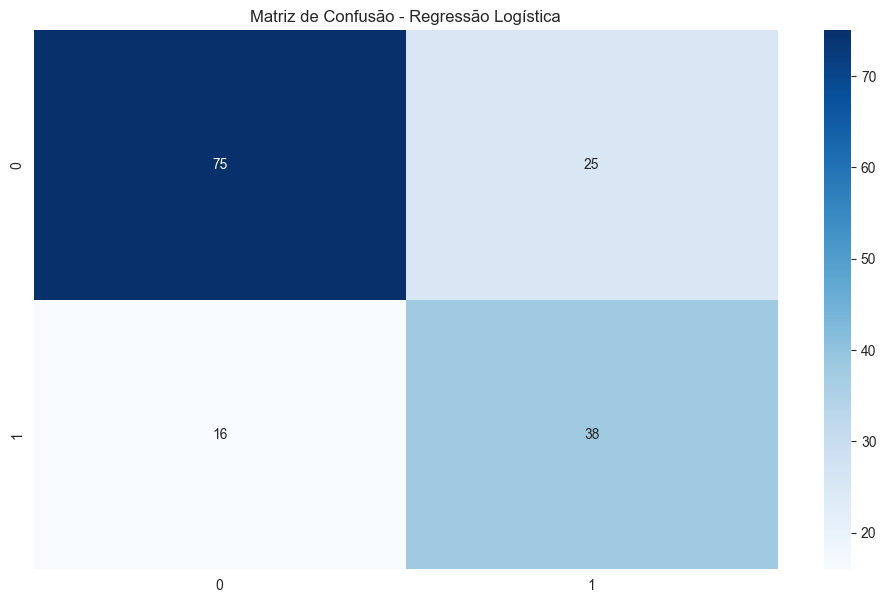

In [21]:
print("--- Resultados da Regressão Logística Balanceada ---")
y_pred_log = log_reg.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_log)
recall_lr = recall_score(y_test, y_pred_log)
f1_lr = f1_score(y_test, y_pred_log)

print(f"Acurácia: {accuracy_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log, target_names=['Não Diabético', 'Diabético']))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues').set_title('Matriz de Confusão - Regressão Logística')
plt.show()

#### Explicação das Métricas:

- Precision (Precisão):

    - Não Diabético (0.82): De todas as vezes que o modelo previu que um paciente não era diabético, ele acertou em 82% dos casos.

    - Diabético (0.60): De todas as vezes que o modelo previu que um paciente era diabético, ele acertou em 60% dos casos. Os outros 40% foram "falsos positivos" (pacientes saudáveis que foram classificados como doentes).

- Recall (Revocação ou Sensibilidade):

    - Não Diabético (0.75): De todos os pacientes que realmente não eram diabéticos no conjunto de teste, o modelo conseguiu identificar corretamente 75% deles.

    - Diabético (0.70): De todos os pacientes que realmente eram diabéticos, o modelo conseguiu identificar corretamente 70% deles. Esta é uma das métricas mais importantes para este problema. Um recall de 70% significa que estamos detectando uma grande parte dos casos positivos, o que é ótimo para uma ferramenta de triagem.

- F1-Score:

    - É a média harmônica entre precision e recall. Ele busca um equilíbrio entre as duas. Um F1-score de 0.65 para a classe "Diabético" indica um equilíbrio razoável, mostrando que o modelo não está sacrificando demais a precisão para alcançar um bom recall.

- Accuracy (Acurácia):

    - A acurácia geral do modelo foi de 73%. Isso significa que ele acertou a classificação (seja ela positiva ou negativa) para 73% de todos os pacientes no conjunto de teste.

- Support:

    - Indica o número de amostras reais em cada classe. Havia 100 pacientes não diabéticos e 54 pacientes diabéticos no conjunto de teste.

#### **6.1. Modelo 2: Árvore de Decisão**


--- Resultados da Árvore de Decisão Balanceada ---
               precision    recall  f1-score   support

Não Diabético       0.79      0.79      0.79       100
    Diabético       0.61      0.61      0.61        54

     accuracy                           0.73       154
    macro avg       0.70      0.70      0.70       154
 weighted avg       0.73      0.73      0.73       154



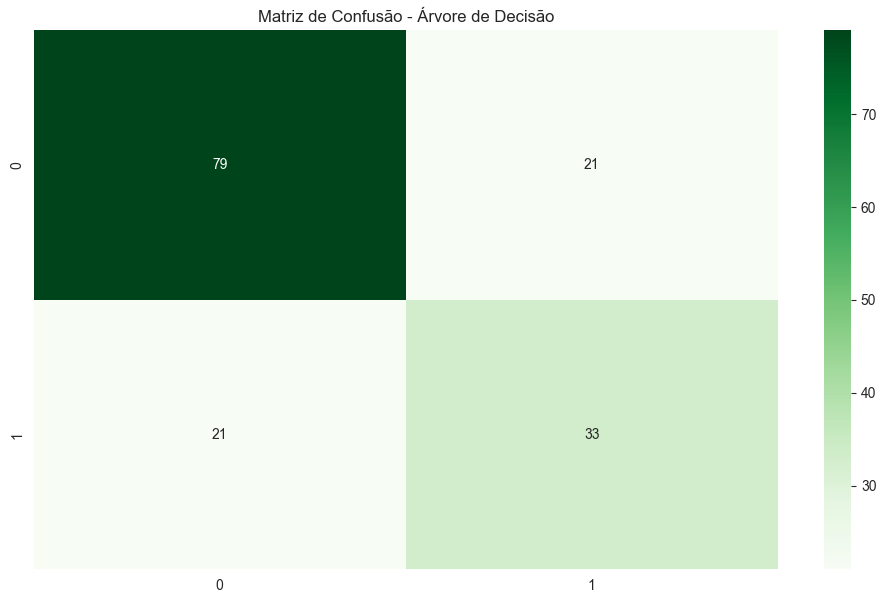

In [22]:
print("\n--- Resultados da Árvore de Decisão Balanceada ---")
y_pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=['Não Diabético', 'Diabético']))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens').set_title('Matriz de Confusão - Árvore de Decisão')
plt.show()

#### Explicação das Métricas:

- Precision (Precisão):

    - Não Diabético (0.79): Quando previu "Não Diabético", acertou 79% das vezes.

    - Diabético (0.61): Quando previu "Diabético", acertou 61% das vezes. Um pouco melhor que a Regressão Logística.

- Recall (Revocação ou Sensibilidade):

    - Não Diabético (0.79): Identificou corretamente 79% dos pacientes realmente saudáveis.

    - Diabético (0.61): Identificou corretamente 61% dos pacientes que realmente eram diabéticos. Este valor é inferior ao da Regressão Logística (70%). Isso significa que este modelo está "deixando passar" mais pacientes doentes sem identificá-los.

- F1-Score:

    - O F1-score de 0.61 para a classe "Diabético" reflete o recall mais baixo. Embora a precisão seja ligeiramente melhor, o modelo é um pouco menos eficaz em encontrar os casos positivos.

- Accuracy (Acurácia):

    - A acurácia geral também foi de 73%, a mesma do outro modelo. Isso mostra como a acurácia sozinha pode ser enganosa, pois os dois modelos têm a mesma acurácia, mas comportamentos diferentes em relação à detecção de doentes.

---

## 7. Interpretação e Conclusão

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_30807/3019178169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')


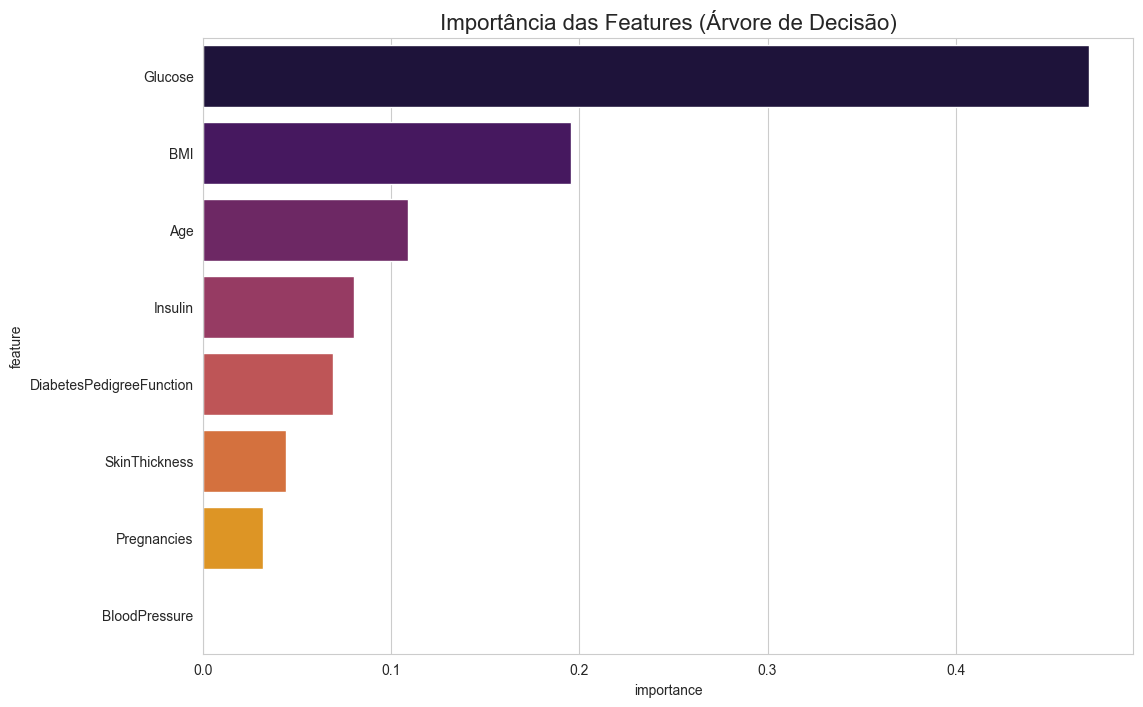

In [23]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')
plt.title('Importância das Features (Árvore de Decisão)', fontsize=16)
plt.show()

---

## Conclusão Final

**Principais Achados:**
1.  **Limpeza de Dados foi Crucial:** O tratamento dos valores `0` inconsistentes foi uma etapa fundamental para garantir a validade do modelo.
2.  **Fatores de Risco Confirmados:** A análise exploratória e a importância das features confirmaram que `Glicose`, `IMC` e `Idade` são os preditores mais significativos para o diagnóstico de diabetes, alinhando-se com o conhecimento clínico.
3.  **Balanceamento de Classes Funciona:** A utilização de `class_weight='balanced'` foi eficaz para criar modelos com alto poder de detecção (recall) para os casos positivos, mesmo que isso signifique uma leve redução na precisão para os casos negativos.

Para um problema de diagnóstico médico, o objetivo principal é maximizar o recall da classe positiva (Diabético), mesmo que isso signifique ter um pouco mais de falsos positivos. É preferível alertar um paciente saudável para um exame extra do que falhar em diagnosticar um paciente doente.

Neste caso, a **Regressão Logística** é o melhor modelo. Apesar de ter uma precisão ligeiramente menor para a classe "Diabético", seu recall de 70% é significativamente superior ao da **Árvore de Decisão** (61%). Isso a torna uma ferramenta de triagem mais confiável e segura para o propósito do projeto.